In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("advertising-sales.csv")

In [4]:
x = data[['tv','radio','newspaper']]
y = data['sales']

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [6]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [7]:
print("Intercept: ",mlr.intercept_)
print("Coefficients:")
print(list(zip(x,mlr.coef_)))

Intercept:  2.6527896688794996
Coefficients:
[('tv', 0.04542559602399794), ('radio', 0.18975772766893614), ('newspaper', 0.0046030789531119965)]


In [8]:
y_pred_mlr = mlr.predict(x_test)
print("Prediction for test set : {}".format(y_pred_mlr))

Prediction for test set : [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]


In [9]:
mlr_diff = pd.DataFrame({"Actual Value": y_test,"Predicted value":y_pred_mlr})
print(mlr_diff)

     Actual Value  Predicted value
126           6.6        10.621601
104          20.7        20.006253
99           17.2        16.918509
92           19.4        19.170407
111          21.8        20.949741
167          12.2        13.122843
116          12.2        11.807407
96           11.7        12.320198
52           22.6        20.578068
69           22.3        20.956627
164          11.9        10.790965
124          19.7        19.548687
182           8.7         6.424039
154          15.6        15.231334
125          10.6         8.972263
196           9.7         7.898979
194          17.3        16.235995
177          11.7        12.026365
163          18.0        17.097022
31           11.9        11.260803
11           17.4        16.978263
73           11.0         9.756557
15           22.4        20.823898
41           17.1        17.209167
97           15.5        15.138162
128          24.7        21.972907
133          19.6        19.201818
82           11.3   

In [11]:
from sklearn import metrics
meabAbErr = metrics.mean_absolute_error(y_test,y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test,y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test,y_pred_mlr))
print("R squared:{:.2f}".format(mlr.score(x,y)*100))
print("Mean Absolute Error: ",meabAbErr)
print("Mean Square Error: ",meanSqErr)
print("Root Mean Square Error:",rootMeanSqErr)


R squared:89.59
Mean Absolute Error:  1.063848312407202
Mean Square Error:  1.8506819941636943
Root Mean Square Error: 1.3603977338130544


In [12]:
print(y_test[1],y_pred_mlr[1])

10.4 20.00625301929181


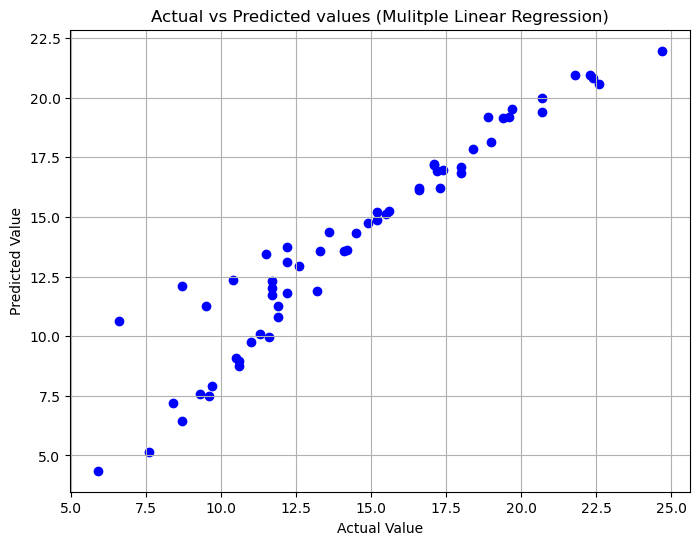

In [15]:
#plot the regression line
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_mlr,color="blue")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted values (Mulitple Linear Regression)")
plt.grid(True)
plt.show()

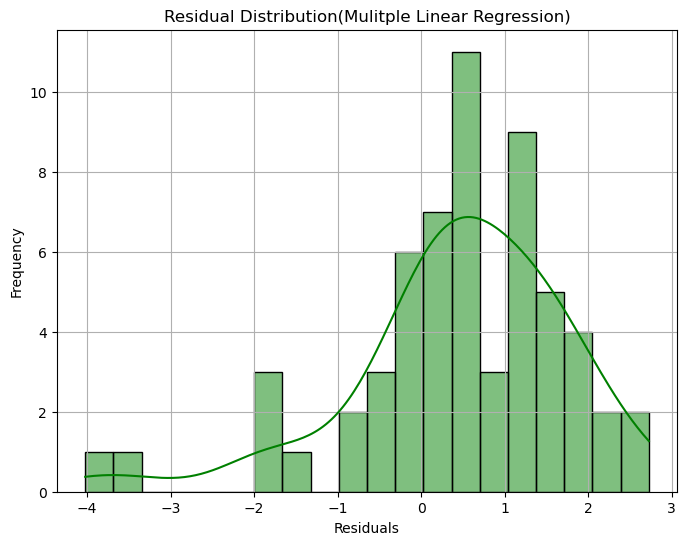

In [16]:
#plotting residuals
residuals = y_test-y_pred_mlr
plt.figure(figsize=(8,6))
sns.histplot(residuals,bins=20,kde=True,color="green")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution(Mulitple Linear Regression)")
plt.grid(True)
plt.show()